# Clasificación supervisada de segmentos de las series de temperatura

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../procData/dataset_series_temporales_tramos.csv")

In [ ]:
print(df.shape)
df

(174, 58)


,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_48,t_49,t_50,t_51,t_52,t_53,t_54,t_55,t_56,label
0,36.369506,36.445393,36.476059,36.579726,36.495129,36.510726,36.550393,36.567393,36.530059,36.556726,...,36.567735,36.470594,36.363055,36.478064,36.606093,36.513609,36.552768,36.536643,36.502069,1
1,36.329549,36.363716,36.363716,36.363716,36.363716,36.363716,36.363716,36.363716,36.363716,36.363716,...,36.910982,36.888416,36.772277,36.748570,36.878558,36.710686,36.820710,36.615203,36.577215,1
2,36.529684,36.505774,36.517708,36.413560,36.356226,36.264115,36.284450,36.178043,35.995197,35.956195,...,36.481226,36.436893,36.453185,36.433585,36.423226,36.423011,36.426724,36.339037,36.372914,1
3,36.369121,36.476743,36.533076,36.489076,36.518516,36.518516,36.518516,36.518516,36.518516,36.518516,...,36.500410,36.427076,36.461410,36.311729,36.321020,36.550743,36.638943,36.692510,36.570243,1
4,36.540847,36.556513,36.494513,36.484180,36.640513,36.569513,36.503524,36.509206,36.507408,36.526513,...,36.641833,36.569513,36.520180,36.592847,36.574862,36.609180,36.550027,36.580847,36.550180,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,36.664017,36.535351,36.351017,36.445684,36.580139,36.718351,36.861684,36.740827,36.660261,36.781684,...,36.754042,36.684772,36.504452,36.671579,36.671358,36.687695,36.868684,36.957767,36.487017,0
170,36.735193,36.755460,36.621460,36.661794,36.654460,36.703794,36.496794,36.514460,36.693794,36.680460,...,36.494127,36.494127,36.494127,36.494127,36.494127,36.494127,36.494127,36.494127,36.494127,0
171,36.546749,36.640105,36.592957,36.384360,36.658105,36.560438,36.639105,36.656105,36.636105,36.613105,...,36.573991,36.574105,36.601105,36.641438,36.665438,36.686105,36.640105,36.596438,36.514833,0
172,36.674175,36.614324,36.681703,36.704525,36.840268,36.770990,36.645036,36.671370,36.689036,36.591703,...,36.857411,36.859319,36.942658,37.070345,36.977359,36.545703,36.545703,36.545703,36.545703,0


In [3]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Datos
X = df.drop("label", axis=1).values
y = df["label"].values

# Configuración de validación cruzada
skf = KFold(n_splits=58*3, shuffle=True, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier
# Modelo
clf = RandomForestClassifier(random_state=42)

y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       116
           1       0.81      0.45      0.58        58

    accuracy                           0.78       174
   macro avg       0.79      0.70      0.72       174
weighted avg       0.79      0.78      0.76       174



In [6]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.94      0.85       116
           1       0.79      0.47      0.59        58

    accuracy                           0.78       174
   macro avg       0.79      0.70      0.72       174
weighted avg       0.78      0.78      0.76       174



In [7]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf', probability=True, random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.94      0.83       116
           1       0.75      0.36      0.49        58

    accuracy                           0.75       174
   macro avg       0.75      0.65      0.66       174
weighted avg       0.75      0.75      0.72       174



In [5]:
from sklearn.svm import SVC

clf = SVC(kernel='poly', probability=True, random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.72      0.73       116
           1       0.48      0.50      0.49        58

    accuracy                           0.65       174
   macro avg       0.61      0.61      0.61       174
weighted avg       0.65      0.65      0.65       174



In [6]:
from sklearn.svm import SVC

clf = SVC(kernel='sigmoid', probability=True, random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.67      1.00      0.80       116
           1       0.00      0.00      0.00        58

    accuracy                           0.67       174
   macro avg       0.33      0.50      0.40       174
weighted avg       0.44      0.67      0.53       174



c:\Users\pablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82       116
           1       0.67      0.34      0.45        58

    accuracy                           0.72       174
   macro avg       0.70      0.63      0.63       174
weighted avg       0.71      0.72      0.70       174



In [9]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.68      0.74       116
           1       0.52      0.69      0.59        58

    accuracy                           0.68       174
   macro avg       0.67      0.69      0.67       174
weighted avg       0.72      0.68      0.69       174



In [10]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=42)
y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       116
           1       0.72      0.53      0.61        58

    accuracy                           0.78       174
   macro avg       0.76      0.72      0.73       174
weighted avg       0.77      0.78      0.77       174



In [11]:
from xgboost import XGBClassifier

clf = XGBClassifier()

y_pred = cross_val_predict(clf, X, y, cv=skf)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       116
           1       0.64      0.50      0.56        58

    accuracy                           0.74       174
   macro avg       0.71      0.68      0.69       174
weighted avg       0.73      0.74      0.73       174



## Mejores modelos

In [12]:
from sklearn.model_selection import GridSearchCV

### Gradient Boosting Classifier

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report

# Modelo base
gbc = GradientBoostingClassifier(random_state=42)

# Grid de parámetros reducida
param_grid_gbc = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [1.0]  # solo sin reducción por simplicidad
}

# Grid Search
grid_search_gbc = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid_gbc,
    scoring='f1_macro',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

grid_search_gbc.fit(X, y)

# Resultados
print("Mejores parámetros (GB):", grid_search_gbc.best_params_)
print("Mejor F1 macro:", grid_search_gbc.best_score_)

best_gbc = grid_search_gbc.best_estimator_
y_pred_gbc = cross_val_predict(best_gbc, X, y, cv=skf)
print(classification_report(y, y_pred_gbc))


Fitting 174 folds for each of 8 candidates, totalling 1392 fits
Mejores parámetros (GB): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Mejor F1 macro: 0.7758620689655172
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       116
           1       0.72      0.53      0.61        58

    accuracy                           0.78       174
   macro avg       0.76      0.72      0.73       174
weighted avg       0.77      0.78      0.77       174



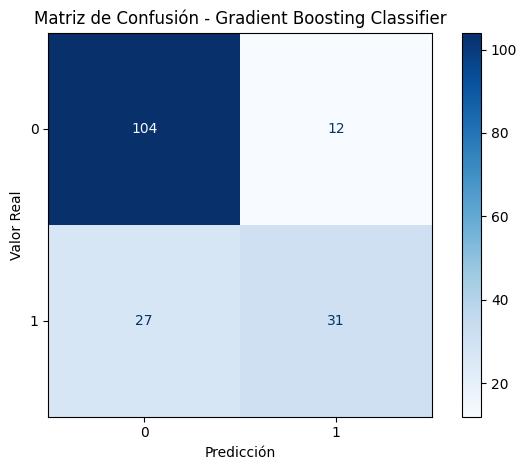

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular matriz de confusión
cm = confusion_matrix(y, y_pred_gbc)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gbc.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'd' para valores enteros

plt.title("Matriz de Confusión - Gradient Boosting Classifier")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.grid(False)
plt.tight_layout()
plt.show()

In [22]:
cm

array([[104,  12],
       [ 27,  31]])

### Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Modelo base
rf = RandomForestClassifier(random_state=42)

# Grid de parámetros reducida
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'max_features': ['sqrt'],  # opción habitual que funciona bien
    'min_samples_split': [2]   # por defecto
}

# Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1_macro',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

grid_search_rf.fit(X, y)

# Resultados
print("Mejores parámetros (RF):", grid_search_rf.best_params_)
print("Mejor F1 macro:", grid_search_rf.best_score_)

best_rf = grid_search_rf.best_estimator_
y_pred_rf = cross_val_predict(best_rf, X, y, cv=skf)
print(classification_report(y, y_pred_rf))


Fitting 174 folds for each of 4 candidates, totalling 696 fits
Mejores parámetros (RF): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}
Mejor F1 macro: 0.7931034482758621
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       116
           1       0.89      0.43      0.58        58

    accuracy                           0.79       174
   macro avg       0.83      0.70      0.72       174
weighted avg       0.81      0.79      0.77       174



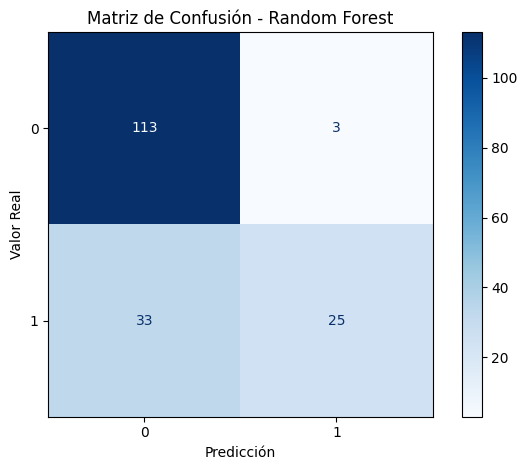

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular matriz de confusión
cm = confusion_matrix(y, y_pred_rf)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'd' para valores enteros

plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.grid(False)
plt.tight_layout()
plt.show()

In [12]:
cm

array([[113,   3],
       [ 33,  25]])

### Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB
# Definir el modelo
gnb = GaussianNB()

# Rango de var_smoothing (usualmente entre 1e-9 y 1e-6 es útil)
param_grid = {
    'var_smoothing': np.logspace(-11, -6, 10)
}

# Grid search
grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=skf,
    verbose=1,
    n_jobs=-1
)

# Entrenar
grid_search.fit(X, y)

# Resultados
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor puntuación F1 (macro):", grid_search.best_score_)

# Predicciones con el mejor modelo
best_gnb = grid_search.best_estimator_
y_pred = cross_val_predict(best_gnb, X, y, cv=skf)
print(classification_report(y, y_pred))


Fitting 174 folds for each of 10 candidates, totalling 1740 fits
Mejores parámetros: {'var_smoothing': np.float64(1e-11)}
Mejor puntuación F1 (macro): 0.6839080459770115
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       116
           1       0.52      0.69      0.59        58

    accuracy                           0.68       174
   macro avg       0.67      0.69      0.67       174
weighted avg       0.72      0.68      0.69       174



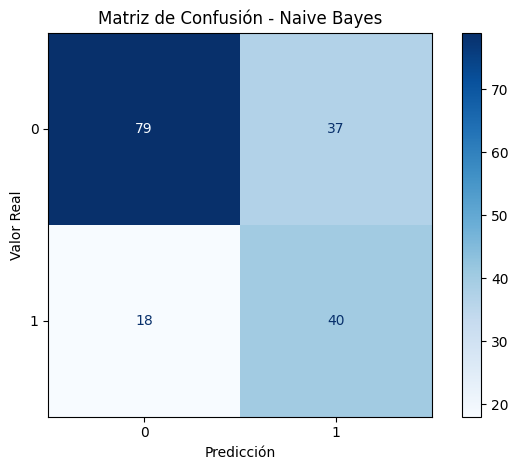

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular matriz de confusión
cm = confusion_matrix(y, y_pred)

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_gnb.classes_)
disp.plot(cmap='Blues', values_format='d')  # 'd' para valores enteros

plt.title("Matriz de Confusión - Naive Bayes")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.grid(False)
plt.tight_layout()
plt.show()

In [20]:
cm

array([[79, 37],
       [18, 40]])